   > ## Importation des librairies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


> ## Importation des algorithmes:

In [2]:
from sklearn.cluster import KMeans

> ## Importation du jeu de donnees et description:

In [3]:
Stress = pd.read_excel (r"C:\Users\Utilisateur\Documents\Master 2\Machine Learning\BDD.xlsx")

In [4]:
Stress.keys

<bound method NDFrame.keys of         hs      sr      rr     hr      bo     rem      lm       t  sl
0    1.840  93.800  25.680  74.20  89.840   99.60  16.600  91.840   3
1    1.552  91.640  25.104  72.76  89.552   98.88  15.880  91.552   3
2    7.000  60.000  20.000  60.00  95.000   85.00  10.000  96.000   1
3    0.768  85.760  23.536  68.84  88.768   96.92  13.920  90.768   3
4    8.248  48.120  17.248  53.12  96.248   72.48   6.496  97.872   0
..     ...     ...     ...    ...     ...     ...     ...     ...  ..
625  3.440  69.600  20.960  62.40  90.960   89.80  10.960  92.960   2
626  8.376  48.440  17.376  53.44  96.376   73.76   6.752  98.064   0
627  0.000  97.504  27.504  78.76  84.256  101.88  17.752  86.880   4
628  6.728  58.640  19.728  59.32  94.592   84.32   9.728  95.728   1
629  4.088  73.920  21.392  63.48  91.392   91.96  11.392  93.392   2

[630 rows x 9 columns]>

In [5]:
print (Stress.sr)
print (Stress.sl[0:3])

0      93.800
1      91.640
2      60.000
3      85.760
4      48.120
        ...  
625    69.600
626    48.440
627    97.504
628    58.640
629    73.920
Name: sr, Length: 630, dtype: float64
0    3
1    3
2    1
Name: sl, dtype: int64


In [6]:
Stress.head()

,hs,sr,rr,hr,bo,rem,lm,t,sl
0,1.840,93.80,25.680,74.20,89.840,99.60,16.600,91.840,3
1,1.552,91.64,25.104,72.76,89.552,98.88,15.880,91.552,3
2,7.000,60.00,20.000,60.00,95.000,85.00,10.000,96.000,1
3,0.768,85.76,23.536,68.84,88.768,96.92,13.920,90.768,3
4,8.248,48.12,17.248,53.12,96.248,72.48,6.496,97.872,0


In [7]:
print(Stress.columns)

Index(['hs', 'sr', 'rr', 'hr', 'bo', 'rem', 'lm', 't', 'sl'], dtype='object')


In [8]:
Stress.describe()

,hs,sr,rr,hr,bo,rem,lm,t,sl
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.00000,630.000000
mean,3.700000,71.600000,21.800000,64.500000,90.900000,88.500000,11.700000,92.80000,2.000000
std,3.054572,19.372833,3.966111,9.915277,3.902483,11.893747,4.299629,3.52969,1.415337
min,0.000000,45.000000,16.000000,50.000000,82.000000,60.000000,4.000000,85.00000,0.000000
25%,0.500000,52.500000,18.500000,56.250000,88.500000,81.250000,8.500000,90.50000,1.000000
50%,3.500000,70.000000,21.000000,62.500000,91.000000,90.000000,11.000000,93.00000,2.000000
75%,6.500000,91.250000,25.000000,72.500000,94.250000,98.750000,15.750000,95.50000,3.000000
max,9.000000,100.000000,30.000000,85.000000,97.000000,105.000000,19.000000,99.00000,4.000000


In [9]:
x = Stress[['hs','sr','rr','hr','bo', 'rem', 'lm', 't','sl']]


In [10]:
print(x)

        hs      sr      rr     hr      bo     rem      lm       t  sl
0    1.840  93.800  25.680  74.20  89.840   99.60  16.600  91.840   3
1    1.552  91.640  25.104  72.76  89.552   98.88  15.880  91.552   3
2    7.000  60.000  20.000  60.00  95.000   85.00  10.000  96.000   1
3    0.768  85.760  23.536  68.84  88.768   96.92  13.920  90.768   3
4    8.248  48.120  17.248  53.12  96.248   72.48   6.496  97.872   0
..     ...     ...     ...    ...     ...     ...     ...     ...  ..
625  3.440  69.600  20.960  62.40  90.960   89.80  10.960  92.960   2
626  8.376  48.440  17.376  53.44  96.376   73.76   6.752  98.064   0
627  0.000  97.504  27.504  78.76  84.256  101.88  17.752  86.880   4
628  6.728  58.640  19.728  59.32  94.592   84.32   9.728  95.728   1
629  4.088  73.920  21.392  63.48  91.392   91.96  11.392  93.392   2

[630 rows x 9 columns]


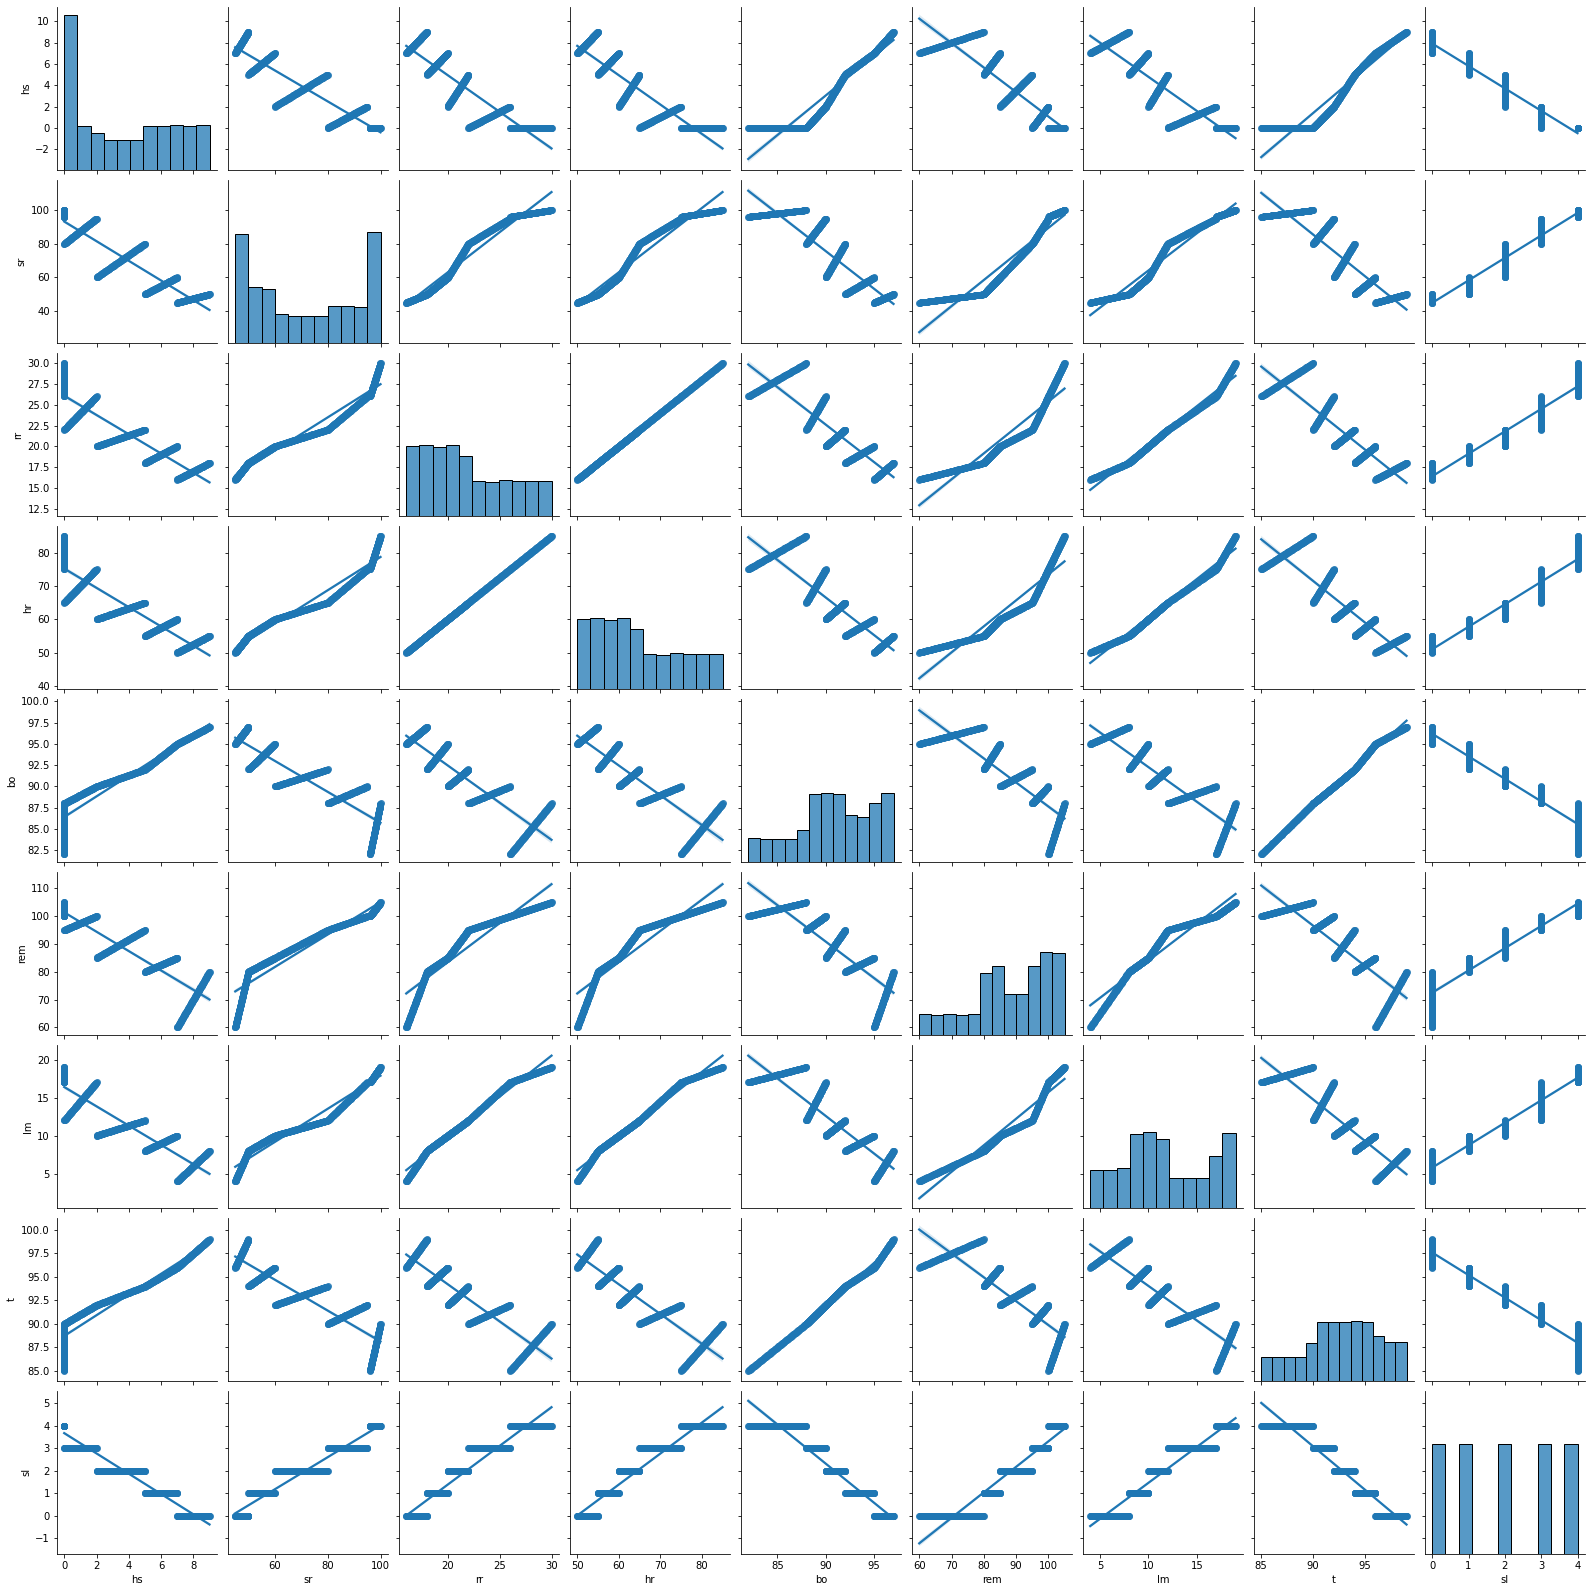

In [11]:
sns.pairplot(x, kind='reg')

> ## K-Means 

In [12]:
X=Stress.to_numpy()

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


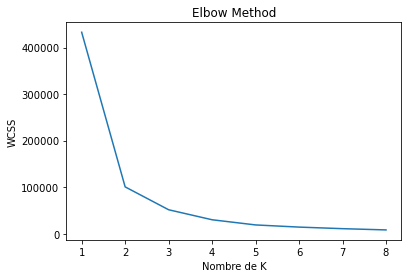

In [13]:
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")

wcss = []
for i in range(1, 9):
    OptK = KMeans(n_clusters=i, init = 'k-means++', max_iter = 100, n_init = 5, random_state = 0)
    OptK.fit(X)
    wcss.append(OptK.inertia_)
    
plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de K')
plt.ylabel('WCSS')
plt.show() 
    
    
    #Valeur optimale de K = 2 

In [14]:
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(X)

KMeans(n_clusters=2)

In [15]:
labels_2 = k_mean2.labels_
print (labels_2)

clusters_2 = k_mean2.cluster_centers_
clusters_2
       
       

[1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 

array([[ 6.0300423 , 54.82767372, 18.6262719 , 56.56567976, 93.76524471,
        79.08302115,  8.24560725, 95.38458006,  0.85800604],
       [ 1.12058863, 90.16735786, 25.3133913 , 73.28347826, 87.72810702,
        98.92481605, 15.52409365, 89.93880936,  3.26421405]])

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels_2)

0.6433494525449044

Text(0, 0.5, 'Niveau de stress')

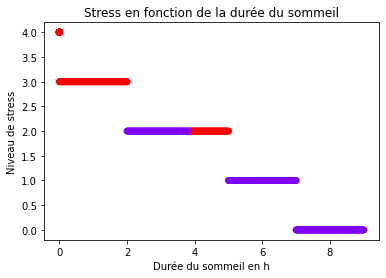

In [21]:
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(X[:,0],X[:,8], c=k_mean2.labels_, cmap='rainbow')
plt.title ("Stress en fonction de la durée du sommeil")
plt.xlabel("Durée du sommeil en h")
plt.ylabel("Niveau de stress")


Text(0, 0.5, 'Niveau de stress')

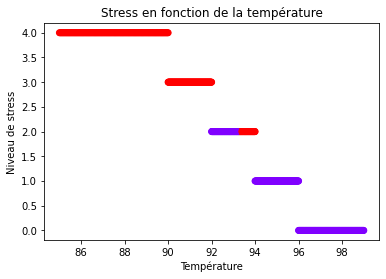

In [18]:
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(X[:,7],X[:,8], c=k_mean2.labels_, cmap='rainbow')
plt.title ("Stress en fonction de la température")
plt.xlabel("Température")
plt.ylabel("Niveau de stress")

# 2 clusters bases sur la durée du sommeil & niveau de stress 

Text(0, 0.5, 'Niveau de stress')

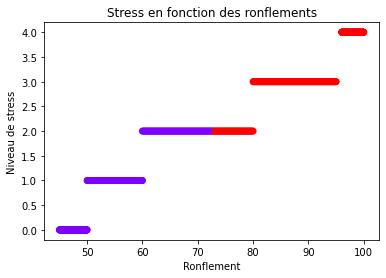

In [19]:
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(X[:,1],X[:,8], c=k_mean2.labels_, cmap='rainbow')
plt.title ("Stress en fonction des ronflements")
plt.xlabel("Ronflement")
plt.ylabel("Niveau de stress")

# 2 clusters bases sur la durée du sommeil & niveau de stress 